**ED9 - Momentos**

Aluno: Mauricio dos Santos de Jesus


1) A partir da imagem abaixo, resolvam os seguintes itens usando Momentos:

a. A area do objeto;

b. O centróide;

c. O momento Central e a matriz de inercia;

d. Uma elipse equivalente;

e. A orientação do objeto;

f. Plotar o centróide e a elipse equivalente sobre o objeto na imagem.

<ipython-input-12-69ee063d0370>:36: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ellipse = Ellipse((cX, cY), np.sqrt(eigenvalues[0] * 5), np.sqrt(eigenvalues[1] * 5), orientation * 180 / np.pi,


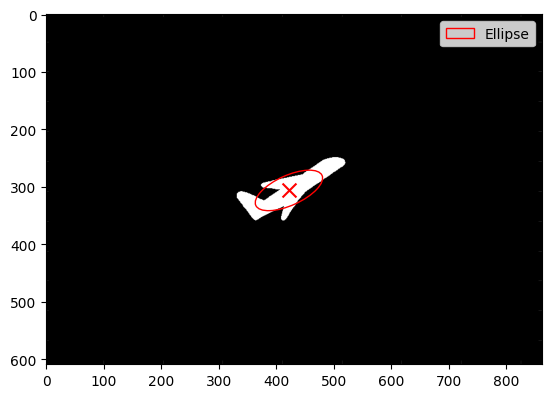

Centróide: (422, 306)
Orientação do objeto (em graus): -24.41443467192415
Autovalores da matriz de inércia: [3202.05066876  537.85986549]
Autovetores da matriz de inércia:
 [[ 0.91057956  0.41333385]
 [-0.41333385  0.91057956]]


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Carregar a imagem usando OpenCV
img = cv2.imread("/content/aviao_ed.png")

# Converter a imagem para escala de cinza
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Calcular os momentos na imagem em escala de cinza
M = cv2.moments(gray_img)
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])

# Cálculo dos momentos centrais
mu20 = M["mu20"] / M["m00"]
mu02 = M["mu02"] / M["m00"]
mu11 = M["mu11"] / M["m00"]

# Cálculo da matriz de inércia
inertia_matrix = np.array([[mu20, mu11], [mu11, mu02]])

# Cálculo da orientação
orientation = 0.5 * np.arctan((2 * mu11) / (mu20 - mu02))

# Cálculo dos autovalores e autovetores da matriz de inércia
eigenvalues, eigenvectors = np.linalg.eig(inertia_matrix)

# Mostrar a imagem e o centróide
plt.imshow(gray_img, cmap='gray')
plt.scatter(cX, cY, color='red', marker='x', s=100)

# Plotando o centróide e a elipse equivalente sobre a imagem
ellipse = Ellipse((cX, cY), np.sqrt(eigenvalues[0] * 5), np.sqrt(eigenvalues[1] * 5), orientation * 180 / np.pi,
                  fill=False, color="red", label="Ellipse")
plt.gca().add_patch(ellipse)



plt.grid(False)
plt.legend()
plt.show()

print("Centróide:", (cX, cY))
print("Orientação do objeto (em graus):", orientation * 180 / np.pi)
print("Autovalores da matriz de inércia:", eigenvalues)
print("Autovetores da matriz de inércia:\n", eigenvectors)
